In [1]:
import sympy as sym
from sympy import Symbol, exp, series, limit, Rational, init_printing, sinh, sqrt, log, symbols, Function, diff, collect, solve
init_printing()

# Задание 1

In [2]:
eps = Symbol("varepsilon", real=True)
x = Symbol("x", real=True)

In [3]:
f = (1 + eps*x)**(1/eps)
# f = sinh(sqrt(1 + eps*x))
f

In [4]:
limit(f,eps,0,'+')

In [5]:
limit(f/(exp(eps)**(-1)),eps,0,'+')

## Вопрос: как подобрать калибровочные функции? Что делать с e^x?

In [6]:
Nexpand=11 # Порядок разложения
cflst=[exp(eps)**i for i in range(-1,Nexpand-1)] # Список калибровочных функций
a=[limit(f/cflst[0],eps,0,'+')]  # Первый член разложения
cflst,a

In [7]:
for i in range(1,Nexpand):
    psum=sum([a[j]*cflst[j] for j in range(i)])
    a.append(limit((f-psum)/cflst[i],eps,0,'+'))

f_expand = sum([a[j]*cflst[j] for j in range(Nexpand)])
f_expand

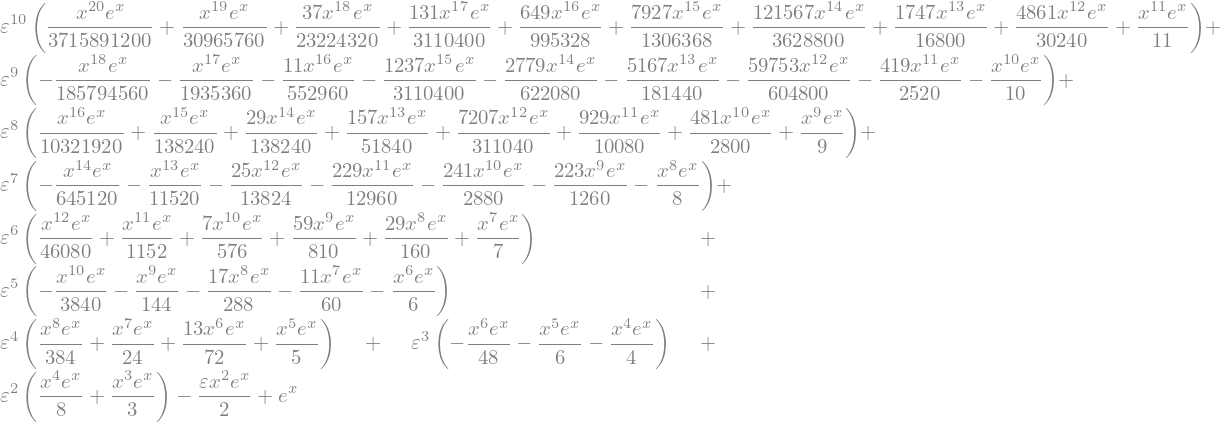

In [8]:
series(f,eps,0,Nexpand,'+').removeO()

In [9]:
f1 = sinh(sqrt(1 + eps*x))

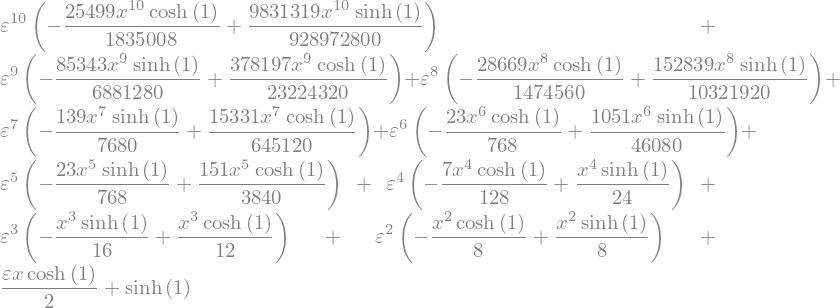

In [10]:
series(f1,eps,0,Nexpand,'+').removeO()

# Задание 2

In [11]:
eps = Symbol("varepsilon", real=True)
# x = Symbol("x", real=True)

In [12]:
Nexpand=9
x=symbols(f'x0:{Nexpand+2}')#это список индексированных переменных
X=Symbol('X')

In [13]:
eq1 = X**2 - (3 + eps)*X + 1 + eps
eq1

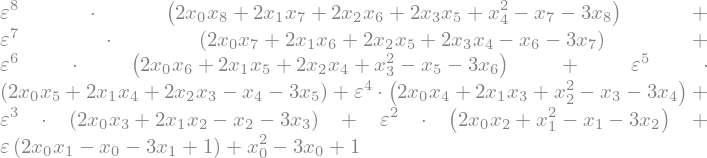

In [14]:
Subsseries=sum(x[i]*eps**i for i in range(Nexpand))
# Подстановка ряда в уравнение и группировка по epsilon
Res=series(collect(eq1.subs(X,Subsseries).expand(),eps),eps,0,Nexpand).removeO() 
Res

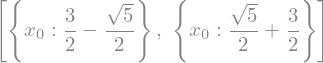

In [15]:
# Находим корни невозмущённого уравнения
roots0=solve(Res.coeff(eps,0),dict=True)
roots0

{x0: 3/2 - sqrt(5)/2}


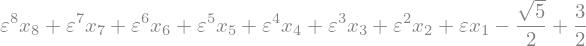

In [16]:
# Находим коэффициенты разложения первого корня
root1a=roots0[0]
Sys1=[Res.coeff(eps,i).subs(root1a) for i in range(Nexpand)]
root1a.update(solve(Sys1))
#Sol1=dict(root1,**)
print(root1a)
Subsseries.subs(root1a)

## Почему у меня получаются иксы вместо коэффициентов разложения?

{x0: sqrt(5)/2 + 3/2}


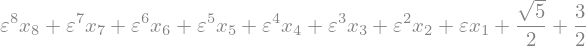

In [17]:
# Находим коэффициенты разложения второго корня
root2a=roots0[1]
Sys2=[Res.coeff(eps,i).subs(root2a) for i in range(Nexpand)]
root2a.update(solve(Sys2))
#Sol1=dict(root1,**)
print(root2a)
Subsseries.subs(root2a)

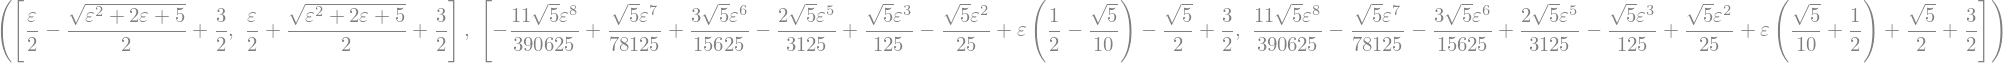

In [18]:
# Разложение точного решения
Sol=solve(eq1,X)
Solseries=[series(sol,eps,0,Nexpand).removeO() for sol in Sol]
Sol,Solseries

# Задание 3

In [19]:
eq2 = eps*X**3 - 3*X + 1 + eps
eq2

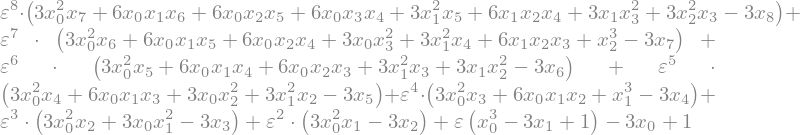

In [20]:
Subsseries=sum(x[i]*eps**i for i in range(Nexpand))
# Подстановка ряда в уравнение и группировка по epsilon
Res=series(collect(eq2.subs(X,Subsseries).expand(),eps),eps,0,Nexpand).removeO() 
Res

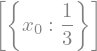

In [21]:
# Находим корни невозмущённого уравнения
roots0=solve(Res.coeff(eps,0),dict=True)
roots0

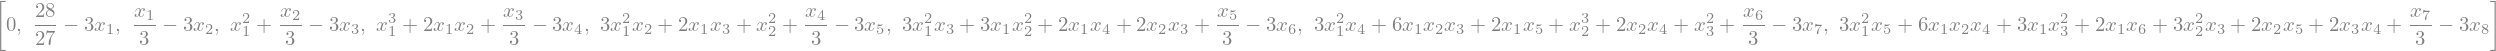

In [22]:
# Находим коэффициенты разложения первого корня
root1a=roots0[0]
Sys1=[Res.coeff(eps,i).subs(root1a) for i in range(Nexpand)]
Sys1

In [23]:
root1a.update(solve(Sys1))
#Sol1=dict(root1,**)
print(root1a)
Subsseries.subs(root1a)

ValueError: dictionary update sequence element #0 has length 8; 2 is required

In [ ]:
# Находим коэффициенты разложения второго корня
root2a=roots0[1]
Sys2=[Res.coeff(eps,i).subs(root2a) for i in range(Nexpand)]
root2a.update(solve(Sys2))
#Sol1=dict(root1,**)
print(root2a)
Subsseries.subs(root2a)

In [ ]:
# Разложение точного решения
Sol=solve(eq2,X)
Solseries=[series(sol,eps,0,Nexpand).removeO() for sol in Sol]
Sol,Solseries